# 文本挖掘COCA数据集标注

大家好，我们是第17组（许欣迪，刘红瑜）。在这里我们将帮助你们完成剩余数据标注部分。

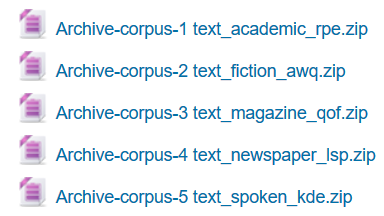

在ispace上大家可以看到有五个数据集，分别是
```python
('Newspaper'),
('Magazine'),
('Academic'),
('Fiction'),
('Spoken')
```

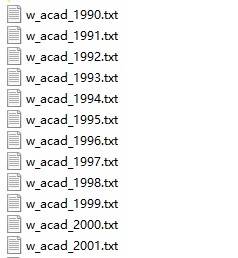

每个压缩包里有若干如上图所示的文件，其中这些txt文件名中的数字，代表出版年份。

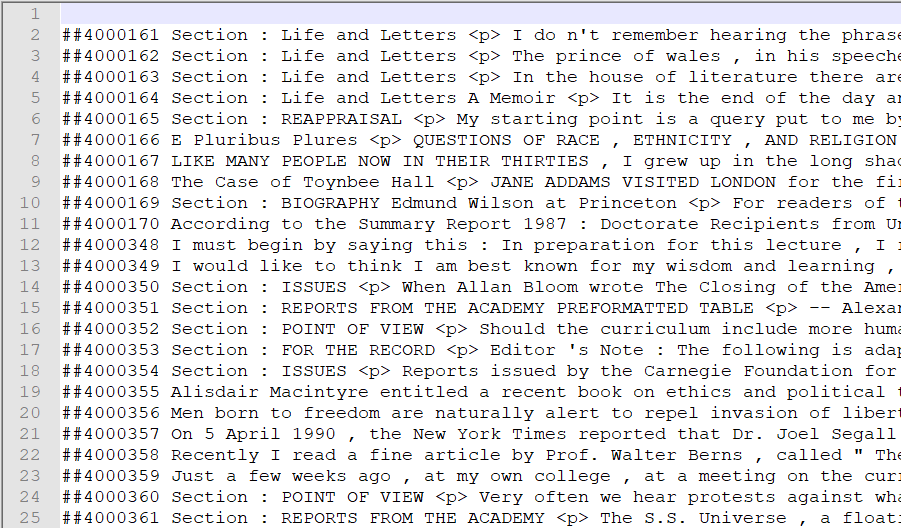

这是一个txt文件的部分截图，可以看到，txt文件中**每一行对应一条数据**，其中前面的`##4000161`为该条数据在COCA数据库里的id[在mongoDB中为`id_of_content`]，紧接着id的是数据的内容[在mongoDB中为`content`]

以下是我们在mongoDB中定义的field

```python
GENRE = (('Newspaper'),
         ('Magazine'),
         ('Academic'),
         ('Fiction'),
         ('Spoken'))

class Coca(Document):
    genre = StringField(required=True, choices=GENRE)  # 类别
    id_of_txt = StringField(required=True)  # txt文件的名字
    year_of_publication = StringField(required=True)  # 该txt发布时间
    id_of_content = StringField(required=True)  # 该条数据的COCA id
    pre_doc = ReferenceField('Coca', reverse_delete_rule=CASCADE)  # 同一个txt里的该条数据的上一条数据
    next_doc = ReferenceField('Coca', reverse_delete_rule=CASCADE)  # 同一个txt里的该条数据的下一条数据
    page = IntField(required=False)  # 当前是这个txt里的第几条数据
    pages = IntField(required=False)  # 这个txt里共有多少数据
    number_of_words = LongField(required=True)  # 这条数据有多少单词
    volume = LongField(required=True)  # 这条数据的占用空间，按字节算
    create_time = DateTimeField(required=True)  # 第一次插入这条数据到mongoDB的时间
    update_time = DateTimeField(required=True)  # 最后一次在mongoDB上修改这条数据的时间
    content = StringField(required=True)  # 数据内容
```

现在nicolas老师要求我们对部分数据进行手工标注，他要求找出所有包含单词`astronomy` `refugees` `cancer` `biodiversity`的数据*(大小写不敏感)*

经搜索，发现共有**2304**条数据符合预期

共有单词13883581个

平均每人需阅读283338个单词

由于每条数据字数不同*(200-12000)不等*，难以精准的拆分数据。因此，每个小组需要标注的数据的总单词量会有些许不同。

但经过算法优化与分析，还是得到了比较符合预期的分法，以下是拆分结果(49人)

280745
284975
280725
283086
282146
282502
288012
281942
279831
282710
283642
281750
282561
287062
284551
281824
282328
286697
280120
283340
283502
282142
282194
283776
285791
286713
280249
286662
282155
279422
280829
287112
280457
279842
280300
284472
281035
280584
279700
281074
281473
281691
279857
281062
283093
287497
286187
287284
306877

可以看到，拆分的结果较为平均

以下是每组需要处理的文件:

`Group1:member-1.csv,member-2.csv,member-3.csv`

`Group2:member-4.csv,member-5.csv,member-6.csv`

`Group3:member-7.csv,member-8.csv,member-9.csv`

`Group4:member-10.csv,member-11.csv,member-12.csv`

`Group5:member-13.csv,member-14.csv,member-15.csv`

`Group6:member-16.csv,member-17.csv,member-18.csv`

`Group7:member-19.csv,member-20.csv,member-21.csv,member-22.csv`

`Group8:member-23.csv,member-24.csv,member-25.csv`

`Group9:member-26.csv,member-27.csv,member-28.csv`

`Group10:member-29.csv,member-30.csv,member-31.csv`

`Group11:member-32.csv,member-33.csv,member-34.csv`

`Group12:member-35.csv,member-36.csv,member-37.csv`

`Group13:member-38.csv,member-39.csv,member-40.csv`

`Group14:member-41.csv,member-42.csv,member-43.csv`

`Group15:member-44.csv,member-45.csv,member-46.csv`

`Group16:member-47.csv,member-48.csv,member-49.csv`

每个`member-xx.csv`内容如下

In [15]:
import csv
with open('demo-init.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        print(', '.join(row))

4000061
4000064
4000239
4000241
4000879
4000882
4001050
4001647
4001649
4001650
4001849
4001984
4002382
4002386
4002389
4002628
4002629
4003098
4003338
4003341
4003344
4003444
4003611
4003614
4003615
4003784
4003893
4003896
4004152
4004159
4004358
4004541
4004785
4004788
4005382
4005491
4006884


可以看到，这些都是每条数据的COCA id[在mongoDB中为`id_of_content`]，现在我们试试通过id找到数据

In [16]:
import pymongo

In [18]:
client = pymongo.MongoClient("mongodb://mongo.stu.tm.uicds.xyz:27017/")
client.admin.authenticate("platform", "platform")

True

In [19]:
client.list_database_names()

['group1',
 'group10',
 'group11',
 'group12',
 'group13',
 'group14',
 'group15',
 'group16',
 'group17',
 'group2',
 'group3',
 'group4',
 'group5',
 'group6',
 'group7',
 'group8',
 'group9']

In [20]:
db = client.group17
db.list_collection_names()

['taoism', 'coca']

In [21]:
col = db.coca

In [22]:
q = {'id_of_content':'4000061'}
 
docs = col.find(q)
 
# for x in docs:
#     print(x)
docs[0]

{'_id': ObjectId('5e7a0d9ff12e85af63e54b5d'),
 'genre': 'Academic',
 'id_of_txt': 'w_acad_1998.txt',
 'year_of_publication': '1998',
 'id_of_content': '4000061',
 'page': 1,
 'pages': 875,
 'number_of_words': 3709,
 'volume': 20980,
 'create_time': datetime.datetime(2020, 3, 24, 13, 39, 43, 11000),
 'update_time': datetime.datetime(2020, 3, 24, 13, 39, 43, 26000),
 'content': '##4000061 Section : Features Elegant experiments confirm long-held theory of cellular aging <p> They have found a way to re-verse the aging process , " Tom Brokaw proclaimed on the NBC Nightly News on January 14 , 1998 . Brokaw was referring to experimental results from researchers at Geron Corporation , in Menlo Park , California , and at the University of Texas Southwestern Medical Center at Dallas . The work showed that providing normal somatic cells with the enzyme telomerase extends the length of their chromosome tips ( telomeres ) and renders them immortal , yet healthy . <p> Although the reported results w

同学们需要阅读里面的内容，并对该数据进行标注。同学们需要给这些数据贴标签，每条数据只能从以下五个标签中选择一个**(如与多个标签相似，请选择最相似的那一个)**。*每组只需要创建一个csv文件并对每一条数据进行标注*

- Astronomy
- Refugees
- Cancer
- Biodiversity
- Other

以下为写好的文件，**请确保文件通过以下测试！**

**每组只需交一个文件！文件命名格式如下**
- group{x}-annotation-finish.csv

如:

`group1-annotation-finish.csv`

`group16-annotation-finish.csv`

In [108]:
import re
import os
import csv

finish_file = 'demo-finish.csv'  # 请替换成要检测的文件
# demo-finish.csv这个文件除了文件名不符合规范以外，其他都符合规范

if re.match(r'^group([1-9]{1}|1[0-6]{1})-annotation-finish.csv$', os.path.split(finish_file)[-1]) is None:
    raise ValueError("文件名不符合规范！")

tags = ['Astronomy', 'Refugees', 'Cancer', 'Biodiversity', 'Other']
with open(finish_file, 'r') as csvfinish:
    reader = csv.reader(csvfinish)
    for line_number, row in enumerate(reader):
        if re.match(r'^[0-9]{7}$', row[0]) is None:
            raise ValueError("文件第{}行，{}数据id发现错误！请检查id或文件格式".format(line_number+1, row[0]))
        if row[1] not in tags:
            raise ValueError("""文件第{}行，{}标注错误！，请确定一定是
                            'Astronomy', 'Refugees', 'Cancer', 
                            'Biodiversity', 'Other'之一""".format(line_number+1, row[1]))
        print(','.join(row))

4000061,Astronomy
4000064,Astronomy
4000239,Astronomy
4000241,Astronomy
4000879,Astronomy
4000882,Astronomy
4001050,Astronomy
4001647,Astronomy
4001649,Astronomy
4001650,Astronomy
4001849,Refugees
4001984,Refugees
4002382,Refugees
4002386,Refugees
4002389,Refugees
4002628,Refugees
4002629,Refugees
4003098,Refugees
4003338,Refugees
4003341,Refugees
4003344,Refugees
4003444,Refugees
4003611,Cancer
4003614,Cancer
4003615,Cancer
4003784,Cancer
4003893,Cancer
4003896,Cancer
4004152,Cancer
4004159,Biodiversity
4004358,Biodiversity
4004541,Biodiversity
4004785,Biodiversity
4004788,Other
4005382,Other
4005491,Other
4006884,Other
